# Importation des librairies

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
data_path="data/"
print(os.listdir())

['example.py', 'notes.txt', 'notebook-gridsearch.ipynb', 'data', '.ipynb_checkpoints', 'random_forest.ipynb', 'Neural_Network_Pytorch.ipynb', 'modeles', 'HTML']


# Chargement des données
Utilisation d'une dataframe panda

In [168]:
data_files = os.listdir(data_path)
if (len(data_files) != 0):
    for datafile in data_files:
        if (not datafile[0] == "."):
            print(datafile)
            df = pd.read_csv(data_path + datafile, delimiter =";", decimal=",")
            break

DP980Y700_SDG3_2021.csv


# Description des données

In [169]:
df.head()

,Coilnr,Date,Direction,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,n x1000,r x100,Re/Rm,...,Sn ppm,Mid Heating P1(C),After Heating P2(C),After Soaking P3(C),After rapid cooling P4(C),Linespeed (m/min),Zink bottom (gr/m2),Zink top (gr/m2),SKP elongation (%),SKP Pressure (kN)
0,41971853,06-01-21,L,1.92,791,1058,107,63,68,75,...,29,676.178739,796.351746,800.987915,487.601574,51.922714,55.509306,54.877287,0.395166,8271.445498
1,41943566,08-01-21,L,1.01,690,1029,114,77,65,67,...,71,702.678408,801.863220,806.446350,497.245289,130.468628,60.863074,53.569768,0.453954,8263.117895
2,42071675,09-01-21,L,1.62,796,1037,106,60,67,77,...,25,702.122903,808.970886,818.309814,484.193967,78.013863,53.647423,53.234872,0.394861,7390.691312
3,42071668,09-01-21,L,1.62,745,1036,105,64,64,72,...,25,704.809447,811.805298,818.166443,481.330018,76.819946,53.221745,53.219945,0.394584,7435.146814
4,42071705,10-01-21,L,1.92,776,1006,95,62,68,77,...,26,693.695165,817.500122,796.503906,481.701958,63.891125,51.919579,54.494145,0.452333,6744.308326


In [170]:
df.describe()

,Coilnr,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,n x1000,r x100,Re/Rm,Au x10%,FRT (°C),...,Sn ppm,Mid Heating P1(C),After Heating P2(C),After Soaking P3(C),After rapid cooling P4(C),Linespeed (m/min),Zink bottom (gr/m2),Zink top (gr/m2),SKP elongation (%),SKP Pressure (kN)
count,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,...,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,4.519242e+07,1.362336,755.992212,1021.789720,101.112150,61.928349,68.917445,73.953271,55.342679,934.241433,...,35.456386,704.197733,805.902552,815.027914,483.340144,94.834979,55.849999,54.527488,0.399793,6908.133056
std,2.236331e+06,0.278166,43.104795,22.455107,14.728215,11.176132,5.268253,3.375279,7.754281,8.477701,...,13.578183,9.714371,6.758231,6.169880,5.797254,20.600089,4.760644,4.498364,0.029070,1258.780634
min,4.194357e+07,0.810000,658.000000,970.000000,59.000000,31.000000,40.000000,66.000000,31.000000,899.000000,...,20.000000,662.650662,780.974670,795.607117,470.231511,51.922714,49.820602,48.877839,0.299066,4112.522876
25%,4.333904e+07,1.160000,721.000000,1005.000000,92.000000,58.000000,66.000000,71.000000,50.000000,928.000000,...,26.000000,700.004712,801.684357,810.318909,479.396075,78.744143,53.354118,52.429027,0.393439,5996.950708
50%,4.492826e+07,1.370000,763.500000,1023.000000,102.000000,64.000000,69.000000,75.000000,55.000000,934.000000,...,29.000000,705.228958,808.289246,816.970734,482.803692,91.915077,54.355656,53.093873,0.394838,6808.134155
75%,4.703460e+07,1.570000,789.000000,1038.000000,111.000000,70.000000,72.000000,76.000000,60.000000,939.000000,...,42.000000,709.433372,810.248901,819.839996,485.905191,108.873264,56.232747,54.570220,0.395494,7732.074367
max,4.956658e+07,2.040000,851.000000,1082.000000,140.000000,83.000000,91.000000,81.000000,77.000000,960.000000,...,75.000000,754.199046,835.396606,832.460266,509.319692,147.113602,80.683978,79.302885,0.516063,10000.037090


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Coilnr                      642 non-null    int64  
 1   Date                        642 non-null    object 
 2   Direction                   642 non-null    object 
 3   Th mm                       642 non-null    float64
 4   Re02 Mpa                    642 non-null    int64  
 5   Rm Mpa                      642 non-null    int64  
 6   A80 x10%                    642 non-null    int64  
 7   n x1000                     642 non-null    int64  
 8   r x100                      642 non-null    int64  
 9   Re/Rm                       642 non-null    int64  
 10  Au x10%                     642 non-null    int64  
 11  FRT (°C)                    642 non-null    int64  
 12  CT (°C)                     642 non-null    int64  
 13  C ppm                       642 non

# Separation du dataset en train-set et test-set

In [172]:
from sklearn.model_selection import train_test_split

filters = df[["Date", "Direction","Re/Rm"]]

target_re02 = df[["Re02 Mpa"]]
target_rm = df[["Rm Mpa"]]
target_A = df[["A80 x10%"]]

features = df.drop(target_A + target_re02 + target_rm + filters ,axis=1)


X_train,X_test,Y_train_rm,Y_test_rm = train_test_split(features,target_rm,test_size=0.20,random_state=0)
Y_train_rm = Y_train_rm.values.ravel()
Y_test_rm = Y_test_rm.values.ravel()

X_train_re02,X_test_re02,Y_train_re02,Y_test_re02 = train_test_split(features,target_re02,test_size=0.20,random_state=0)
Y_train_re02 = Y_train_re02.values.ravel()
Y_test_re02 = Y_test_re02.values.ravel()

X_train_A,X_test_A,Y_train_A,Y_test_A = train_test_split(features,target_A,test_size=0.20,random_state=0)
Y_train_A = Y_train_A.values.ravel()
Y_test_A = Y_test_A.values.ravel()

print(X_train.shape, X_test.shape, Y_train_rm.shape, Y_test_rm.shape)

(513, 32) (129, 32) (513,) (129,)


# Modele de Régression

## Importation des métriques

In [173]:
from sklearn.metrics import r2_score, mean_squared_error

## Random Forest

### Prédiction de la résistance mécanique $R_m$

In [184]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(bootstrap=False, 
                            max_depth=24, 
                            max_features=13,
                            min_samples_split=4, 
                            n_estimators=80, 
                            n_jobs=-1)

rfr.fit(X_train, Y_train_rm)
print(rfr.score(X_train, Y_train_rm))
print(rfr.score(X_test, Y_test_rm))

Y_pred_rfr = rfr.predict(X_test)
print(Y_pred_rfr.shape)
print(Y_test_rm.shape)

print("R2_score : ", r2_score(Y_test_rm, Y_pred_rfr))
print("MSE : ", mean_squared_error(Y_test_rm, Y_pred_rfr))



0.9978717285976809
0.6881093714531481
(129,)
(129,)
R2_score :  0.6881093714531481
MSE :  157.53544856266163


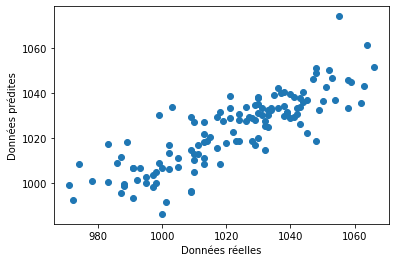

In [185]:
plt.plot( Y_test_rm, Y_pred_rfr, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

### Prédiction de la résistance élastique à 0.2% $R_{e0.2}$

In [186]:
from sklearn.ensemble import RandomForestRegressor


rfr_re02 = RandomForestRegressor(   bootstrap=False, 
                                    max_depth=26, 
                                    max_features=17,
                                    min_samples_split=4, 
                                    n_estimators=110, 
                                    n_jobs=-1)


rfr_re02.fit(X_train_re02, Y_train_re02)
print(rfr_re02.score(X_train_re02, Y_train_re02))
print(rfr_re02.score(X_test_re02, Y_test_re02))

Y_pred_rfr_re02 = rfr_re02.predict(X_test_re02)
print(Y_pred_rfr_re02.shape)
print(Y_test_re02.shape)

print("R2_score : ", r2_score(Y_test_re02, Y_pred_rfr_re02))
print("MSE : ", mean_squared_error(Y_test_re02, Y_pred_rfr_re02))

0.9990943697802303
0.800454225658245
(129,)
(129,)
R2_score :  0.8004542256582448
MSE :  365.140635659882


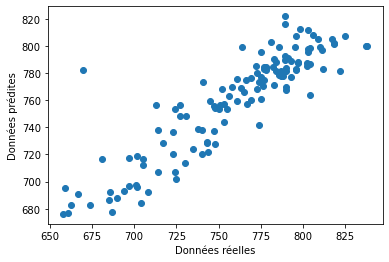

In [199]:
plt.plot(Y_test_re02, Y_pred_rfr_re02, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

### Prédiction de l'allongement à la rupture $A_\%$

In [194]:
from sklearn.ensemble import RandomForestRegressor

rfr_A = RandomForestRegressor(  bootstrap=False, 
                                max_depth=20, 
                                max_features=17,
                                min_samples_split=4, 
                                n_estimators=110, 
                                n_jobs=-1)


rfr_A.fit(X_train_A, Y_train_A)
print(rfr_A.score(X_train_A, Y_train_A))
print(rfr_A.score(X_test_A, Y_test_A))

Y_pred_rfr_A = rfr_A.predict(X_test_A)
print(Y_pred_rfr_A.shape)
print(Y_test_A.shape)

print("R2_score : ", r2_score(Y_test_A, Y_pred_rfr_A))
print("MSE : ", mean_squared_error(Y_test_A, Y_pred_rfr_A))

0.9991336403334773
0.8387497814415037
(129,)
(129,)
R2_score :  0.8387497814415038
MSE :  34.32105427068429


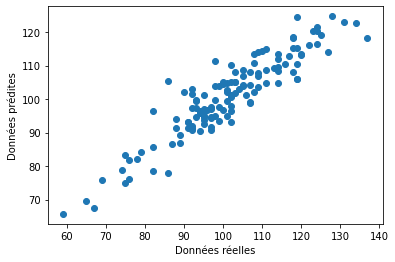

In [200]:
plt.plot( Y_test_A, Y_pred_rfr_A, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

# Enregistrement des modèles

In [196]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_2.pkl', 'wb') as f:
    pickle.dump(rfr_re02, f)

with open(modele_path + 'random_forest_rm_2.pkl', 'wb') as f:
    pickle.dump(rfr, f)
    
with open(modele_path + 'random_forest_A_2.pkl', 'wb') as f:
    pickle.dump(rfr_A, f)  


# Chargement des modèles

In [208]:
import pickle
modele_path = "./modeles/"

with open(modele_path + 'random_forest_rm_2.pkl', 'rb') as f:
    clf_rm = pickle.load(f)
print("-------------------------")
print("Résistance mécanique Rm")
print("-------------------------")
print("Train: ",clf_rm.score(X_train, Y_train_rm))
print("Test: ", clf_rm.score(X_test, Y_test_rm))

with open(modele_path + 'random_forest_re02_2.pkl', 'rb') as f:
    clf_re02 = pickle.load(f)
    
print("-------------------------")
print("Résistance élastique Re02")
print("-------------------------")
print("Train: ", clf_re02.score(X_train_re02, Y_train_re02))
print("Test: ", clf_re02.score(X_test_re02, Y_test_re02))

with open(modele_path + 'random_forest_A_2.pkl', 'rb') as f:
    clf_A = pickle.load(f)
print("-------------------------")
print("Allongement à la rupture A%")
print("-------------------------")
print("Train: ",clf_A.score(X_train_A, Y_train_A))
print("Test: ", clf_A.score(X_test_A, Y_test_A))


-------------------------
Résistance mécanique Rm
-------------------------
Train:  0.9978717285976809
Test:  0.688109371453149
-------------------------
Résistance élastique Re02
-------------------------
Train:  0.9990943697802303
Test:  0.8004542256582448
mse
-------------------------
Allongement à la rupture A%
-------------------------
Train:  0.9991336403334773
Test:  0.8387497814415037
